📄 Employee Count by Experience Range:


,Experience_Range,Employee_Count
0,0-1,85
1,1-2,81
2,2-5,0
3,5-6,5
4,6-7,5
5,7-8,1
6,8-9,3
7,9-10,2
8,Others,118



 Plotting Experience Range Without Grouping...


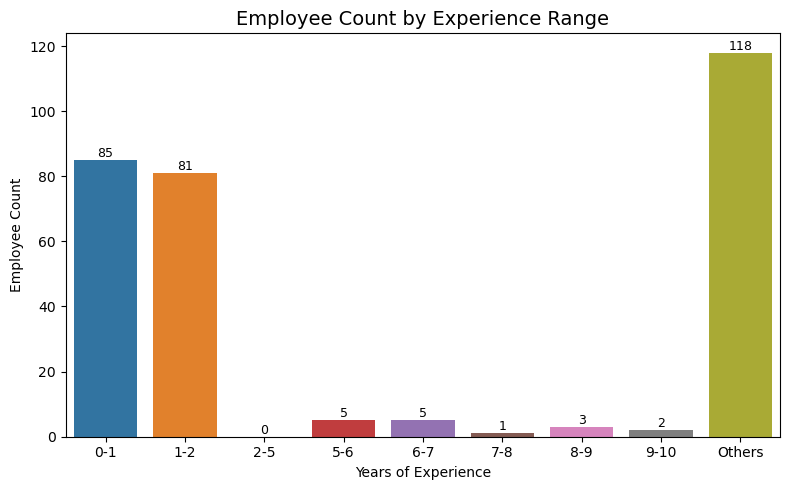


 Employee Count by Experience Range and Location:


,Years_of_Experience,Location,Employee_Count
0,0-1,Bangalore,38
1,0-1,Jaipur,34
2,0-1,Pune,13
3,1-2,Bangalore,40
4,1-2,Jaipur,30
5,1-2,Pune,11
6,5-6,Bangalore,4
7,5-6,Pune,1
8,6-7,Bangalore,4
9,6-7,Pune,1



 Plotting Experience Range Grouped by Location...


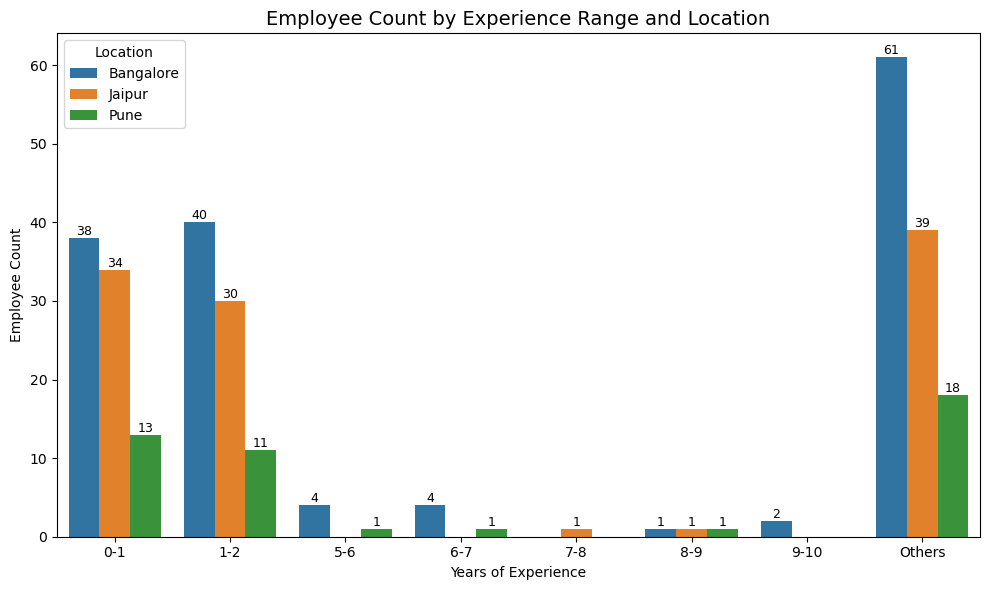


 Employee Count by Experience Range and Role:


,Years_of_Experience,Role,Employee_Count
0,0-1,Analyst,78
1,0-1,Senior Associate,7
2,1-2,Analyst,73
3,1-2,Senior Analyst,7
4,1-2,Senior Associate,1
5,5-6,Senior Associate,5
6,6-7,Senior Associate,5
7,7-8,Manager,1
8,8-9,Manager,3
9,9-10,Manager,2



 Plotting Experience Range Grouped by Role...


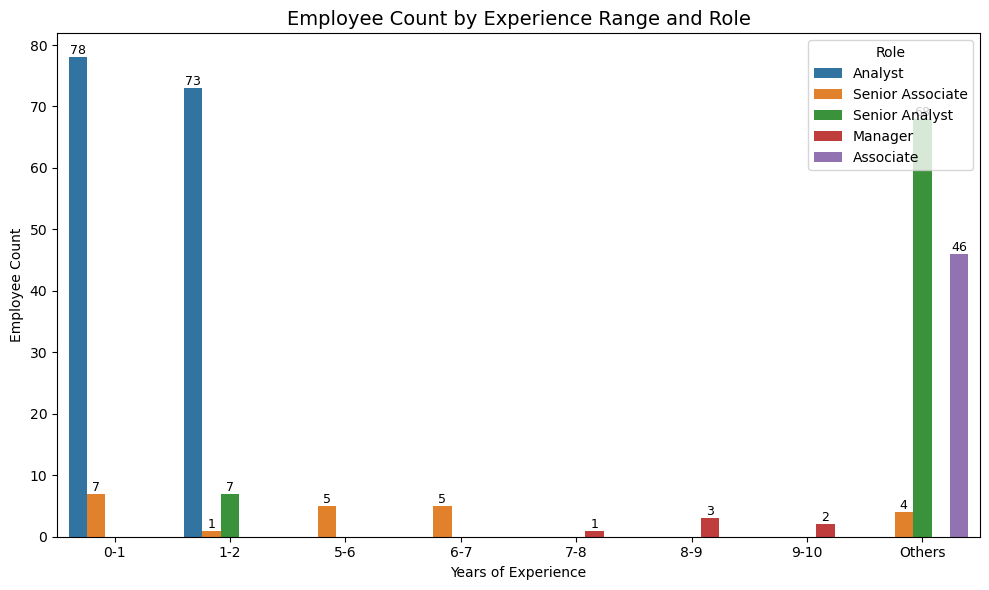

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# ........Loading the data from the database.....
conn = sqlite3.connect("database/techsolve.db")
employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

# ...........Clean column names..............
employee_df.columns = [col.strip().replace(" ", "_").replace("?", "") for col in employee_df.columns]

# 1: .........Counting Employees by Experience Range..........
def count_by_experience():
    # .........Here this defines valid experience ranges.........
    experience_order = ['0-1', '1-2', '2-5', '5-6', '6-7', '7-8', '8-9', '9-10']

    # ....Ensure all values fall into valid ranges; replace unexpected with 'Others'....
    employee_df['Years_of_Experience'] = employee_df['Years_of_Experience'].where(
        employee_df['Years_of_Experience'].isin(experience_order), 'Others'
    )

    # .....Count and ensuring correct order........
    counts = employee_df['Years_of_Experience'].value_counts().reindex(experience_order + ['Others'], fill_value=0)

    # ......Convert to DataFrame with correct column names........
    result_df = counts.reset_index()
    result_df.columns = ['Experience_Range', 'Employee_Count']
    return result_df


# 2:.. .......Group by Experience and Location/Role.............
def group_by_experience_and(option='Location'):
    grouped = employee_df.groupby(['Years_of_Experience', option]).size().reset_index(name='Employee_Count')
    grouped = grouped.sort_values(by=['Years_of_Experience', 'Employee_Count'], ascending=[True, False])
    return grouped

# 3: ................Plot the Counts Clearly...............
def plot_experience_counts(group_by=None):
    if group_by is None:
        data = count_by_experience()
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(data=data, x='Experience_Range', y='Employee_Count')
        plt.title('Employee Count by Experience Range', fontsize=14)
    else:
        data = group_by_experience_and(group_by)
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=data, x='Years_of_Experience', y='Employee_Count', hue=group_by)
        plt.title(f'Employee Count by Experience Range and {group_by}', fontsize=14)
        plt.legend(title=group_by)

    # ...........Add value labels on bars...........
    # ........Add value labels on bars safely.........
    for p in ax.patches:
        if not pd.isna(p.get_height()):
            ax.annotate(f"{int(p.get_height())}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=9)

    plt.xlabel('Years of Experience')
    plt.ylabel('Employee Count')
    plt.tight_layout()

    # ................Save the plot automatically...............
    if not os.path.exists('results'):
        os.makedirs('results')

    plt.savefig(f"results/US2_Employee_Count_Exp_{group_by if group_by else 'Overall'}.png")
    plt.show()

# ..........Outcome Usage:

print("📄 Employee Count by Experience Range:")
display(count_by_experience())

print("\n Plotting Experience Range Without Grouping...")
plot_experience_counts()

print("\n Employee Count by Experience Range and Location:")
display(group_by_experience_and('Location'))

print("\n Plotting Experience Range Grouped by Location...")
plot_experience_counts('Location')

print("\n Employee Count by Experience Range and Role:")
display(group_by_experience_and('Role'))

print("\n Plotting Experience Range Grouped by Role...")
plot_experience_counts('Role')
